# Fits mit Scipy

Scipy ist ein sehr großes Modul mit vielen Funktionen, die für wissenschaftliche Analysen unverzichtbar sind. Dazu gehören:

- Fits (`scipy.optimize`)
- Statistik (`scipy.stats`)
- Integration (`scipy.integrate`)
- Interpolation (`scipy.interpolate`)

Wir beschäftigen uns hier zunächst mit Fits. Die einfachste Funktion für Fits ist `scipy.optimize.curve_fit`:

In [1]:
from scipy.optimize import curve_fit

In [2]:
# Numpy und Matplotlib brauchen wir immer
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

## Ein Modell an Daten fitten

Wir generieren zunächst einige Beispieldaten um dann einen Fit durchzuführen:

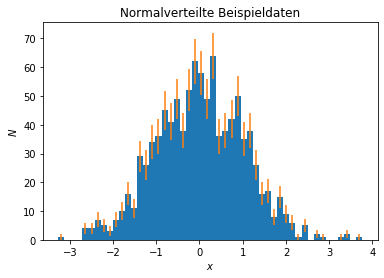

In [3]:
# Zelle ausführen, um Beispieldaten zu generieren
samples = np.random.normal(loc=0, scale=1, size=1000)
N, bins, _ = plt.hist(samples, bins=50)
x = bins[:-1] + (bins[1:] - bins[:-1]) / 2  # Mitte der Bins
dN = np.sqrt(N)  # Fehler von N
plt.errorbar(x, N, dN, ls='none')
plt.xlabel(r'$x$')
plt.ylabel(r'$N$')
plt.title('Normalverteilte Beispieldaten')
x, N, dN = x[N!=0], N[N!=0], dN[N!=0]

Zu den Werten `x` haben wir nun normalverteilte Datenpunkte `N` mit Mittelwert $\mu=0$ und Standardabweichung $\sigma=1$. Als Fehler von N wurde $\sqrt{N}$ angenommen.

Diese Daten fitten wir nun an eine Gaußkurve. Wenn alles gut geht, sollten wir den Mittelwert und die Standardabweichung, mit denen die Daten generiert wurden, wieder herausfinden können.

### 1. Fit-Funktion definieren

Zuerst müssen wir die Fit-Funktion definieren:

In [4]:
from numpy import exp, pi, sqrt
def gaussian(x, mu, sigma, A):
    return A / (sigma * sqrt(2 * pi)) * exp(-(x - mu)**2 / sigma**2 / 2)

> **Hinweis:** Das erste Argument der Fit-Funktion muss die unabhängige Variable sein. Alle weiteren Argumente werden als Fit-Parameter interpretiert.

### 2. Fit durchführen

Anschließend können wir die Fit-Funktion, und die Daten an `scipy.optimize.curve_fit` übergeben:

In [5]:
#curve_fit?

Die Funktion führt einen _least-squares_ Fit durch und gibt die Werte der Parameter zurück, wenn der Fit konvergiert. Als weitere Argumente können wir Startwerte `p0` der Parameter für den Fit sowie Fehler angeben:

In [6]:
popt, pcov = curve_fit(gaussian, x, N, p0=[ 0, 1, 100 ], sigma=dN)

Der erste Rückgabewert **`popt`** ist eine Liste der gefundenen Werte der Parameter, welche die Daten am besten beschreiben. Sie sind in der Reihenfolge, wie sie in der Fit-Funktion definiert wurden:

In [7]:
print(popt)

[2.96307548e-04 9.82780444e-01 1.33804791e+02]


Der zweite Rückgabewert **pcov** ist die Kovarianz-Matrix, welche die Varianzen $\sigma^2$ der Parameter auf der Diagonalen enthält:

In [8]:
print(pcov)

[[ 1.45743947e-03 -4.64832912e-05 -2.19254930e-04]
 [-4.64832912e-05  8.39742009e-04  4.89878061e-03]
 [-2.19254930e-04  4.89878061e-03  2.58416098e+01]]


Wir erhalten also für den Mittelwert und die Standardabweichung wie erwartet $\mu=0$ und $\sigma=1$ im Fehlerbereich:

In [9]:
print("mu = {:.3f}+/-{:.3f}".format(popt[0], np.sqrt(pcov[0][0])))
print("sigma = {:.3f}+/-{:.3f}".format(popt[1], np.sqrt(pcov[1][1])))

mu = 0.000+/-0.038
sigma = 0.983+/-0.029


### 3. Fit-Ergebnis plotten

Die optimalen Werte der Fit-Parameter in `popt` können wir nun in die Fit-Funktion einsetzen und diese plotten:

Text(0.5, 1.0, 'Gauß-Fit der Beispieldaten')

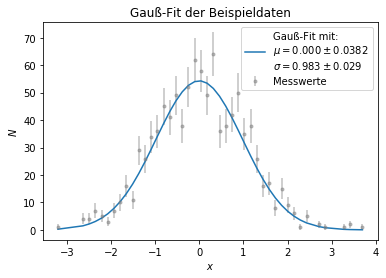

In [10]:
# Datenpunkte plotten
plt.errorbar(x, N, dN, ls='none', marker='.', color='grey', alpha=0.5, label='Messwerte')
# Fit plotten
plt.plot(x, gaussian(x, *popt), label="\n".join(["Gauß-Fit mit:", r'$\mu={:.3f}\pm{:.3}$'.format(popt[0], np.sqrt(pcov[0][0])), r'$\sigma={:.3f}\pm{:.3f}$'.format(popt[1], np.sqrt(pcov[1][1]))]))
plt.legend()
plt.xlabel(r'$x$')
plt.ylabel(r'$N$')
plt.title('Gauß-Fit der Beispieldaten')

> **Hinweis:** Die Parameter in `popt` sind bereits in der richtigen Reihenfolge für die Fit-Funktion. Mit der folgenden Syntax können wir die Liste daher direkt _entpackt_ der Fit-Funktion übergeben:
>
> ```python
> fit_function(x, *popt) # Entpackt die Liste `popt`
> ```

## Aufgabe 1 - Temperaturverlauf in Heidelberg

Wir fitten nun die Temperaturdaten aus Heidelberg, die wir bereits zuvor verwendet haben. Wir können annehmen, dass sich der Jahres-Temperaturverlauf mit der Funktion $$T(t)=T_0+T_A\frac{1-\cos{\!(2\pi (t+\Delta t))}}{2}$$ mit $t\in [0,1]$ beschreiben lässt.

Zuerst lesen wir die Daten ein und bestimmen wie zuvor den Zeitpunkt innerhalb des Jahres $t$:

In [11]:
# Daten einlesen
data = np.loadtxt('data/temperatures.txt')
date, T = data[np.abs(data[:,1]) != 99,:].transpose()
t = date % 1 # Zeitpunkt innerhalb des Jahres

a) Definiere die Fit-Funktion `T_model(t, T_0, T_A, dt)` wie oben angegeben.

In [12]:
from numpy import cos, pi
### BEGIN SOLUTION
T_model = lambda t, T_0, T_A, dt: T_0 + T_A * (1 - cos(2 * pi * (t + dt))) / 2
### END SOLUTION

In [13]:
from numpy.testing import assert_array_almost_equal
try:
    T_model
except NameError:
    raise NameError("Es gibt keine Funktion 'T_model'. Definiere eine Funktion mit diesem Namen.")
assert_array_almost_equal(T_model(np.array([0, 0.5, 1]), -1, 20, -0.04), [ -0.68583161,  18.68583161,  -0.68583161], 3, "Deine Funktion liefert nicht die richtigen Werte. Überprüfe, ob sie mit der Aufgabenstellung übereinstimmt.")
print("Richtig.")

Richtig.


b) Verwende `curve_fit`, um den Fit durchzuführen. Weise drei Variablen `T_0`, `T_A` und `dt` jeweils den durch den Fit bestimmten Wert zu.

In [14]:
popt, pcov = curve_fit(T_model, t, T, p0=[20, 0, 0])
T_0, T_A, dt = popt[0], popt[1], popt[2]
print(popt)

[-0.91433814 19.91036717 -0.04026058]


In [15]:
from numpy.testing import assert_almost_equal
try:
    T_0, T_A, dt
except NameError:
    raise NameError("Es gibt nicht alle der Variablen 'T_0', 'T_A' und 'dt'. Weise die Werte Variablen mit diesen Namen zu.")
assert_almost_equal(T_0, -0.91433813, 3, "Hast du 'T_0' den richtigen Wert zugewiesen? Beachte die Reihenfolge der Parameter in 'popt'.")
assert_almost_equal(T_A, 19.91036717, 3, "Hast du 'T_A' den richtigen Wert zugewiesen? Beachte die Reihenfolge der Parameter in 'popt'.")
assert_almost_equal(dt, -0.04026058, 3, "Hast du 'dt' den richtigen Wert zugewiesen? Beachte die Reihenfolge der Parameter in 'popt'.")
print("Offenbar ist T_0={T_0:.2f}°C, T_A={T_A:.2f}°C und dt={dt:.1f} Tage. Sieht sinnvoll aus, oder?".format(T_0=T_0, T_A=T_A, dt=dt * 365))

Offenbar ist T_0=-0.91°C, T_A=19.91°C und dt=-14.7 Tage. Sieht sinnvoll aus, oder?


c) Plotte das Ergebnis des Fits!

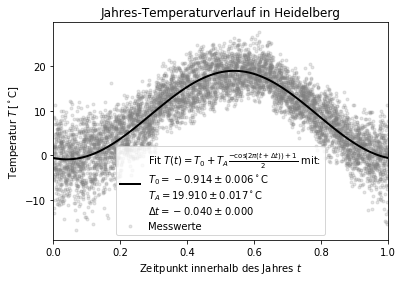

In [16]:
plt.scatter(t, T, marker='.', color='gray', alpha=0.2, label='Messwerte')
### BEGIN SOLUTION
t_model = np.linspace(0, 1, 100)
plt.plot(t_model, T_model(t_model, *popt), color='black', lw=2, label="\n".join([r'Fit $T(t)=T_0+T_A\frac{-\cos{\!(2\pi (t+\Delta t))}+1}{2}$ mit:', r'$T_0={:.3f}\pm{:.3f}'.format(popt[0], pcov[0][0]) + '^\circ\mathrm{C}$', r'$T_A={:.3f}\pm{:.3f}'.format(popt[1], pcov[1][1]) + '^\circ\mathrm{C}$', r'$\Delta t={:.3f}\pm{:.3f}$'.format(popt[2], pcov[2][2])]))
plt.title('Jahres-Temperaturverlauf in Heidelberg')
plt.xlim(0, 1)
plt.xlabel(r'Zeitpunkt innerhalb des Jahres $t$')
plt.ylabel(r'Temperatur $T \, [^\circ{}\mathrm{C}]$')
plt.legend(loc='lower center', fontsize='medium')
### END SOLUTION

Sieht dein Plot etwa so aus?

![Jahres-Temperaturverlauf in Heidelberg mit Fit](plots/203-1c.png)

In [17]:
# Setze die Variable auf `True` wenn du mit deinem Plot zufrieden bist:
plot_1c_fertig = False

In [18]:
from nose.tools import assert_true
assert_true(plot_1c_fertig, "Versuche dich an Aufgabe 1c, bis du mit deinem Plot zufrieden bist.")
print("😱 Ein Meisterwerk.")

AssertionError: False is not true : Versuche dich an Aufgabe 1c, bis du mit deinem Plot zufrieden bist.